# <U>The Sparks Foundation</U>
#### Task-1 :<span style="font-weight:normal;"> <U>Prediction using Supervised ML</U><br><br> Predict the percentage of marks of a student based on the number of study hours.</span>

### Name : <span style="font-weight:normal;"><U>Ishan Agarwal</U></span>
#### Step 1 : <span style="font-weight:normal;">Importing libraries and datasets</span>

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Reading data from the given link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Step 2 : <span style="font-weight:normal;">Plotting the distribution of percentage scores against the no. of hours studied</span>

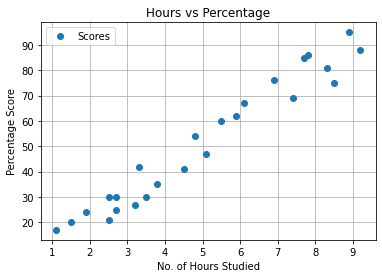

In [3]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

#### Step 3 : <span style="font-weight:normal;">Preparing the data into input and output and splitting the dataset into training and testing sets.</span>

In [4]:
# Preparing data for hours
X = data.iloc[:, : 1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [5]:
# Preparing data for scores
Y = data.iloc[:, 1: ].values
print(Y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [6]:
# Splitting dataset
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#### Step 4 : <span style="font-weight:normal;">Training the model using Linear Regression Algorithm</span>

In [7]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, Y_train)

LinearRegression()

In [8]:
# Coefficient and intercept of our model
coef = lr.coef_
intercept = lr.intercept_
print("Coefficient : "+str(coef[0][0]))
print("Intercept : "+str(intercept[0]))

Coefficient : 9.910656480642233
Intercept : 2.0181600414346974


#### Step 5 : <span style="font-weight:normal;">Visualizing the model</span>

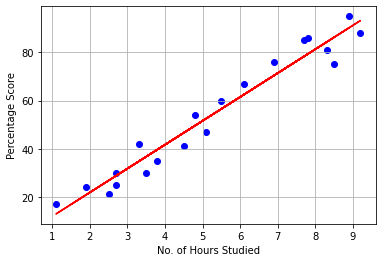

In [9]:
# Plotting the regression line
line = coef*X + intercept

# Plotting for the test data
plt.show()
plt.scatter(X_train, Y_train, color="Blue")
plt.plot(X, line, color="Red");
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

#### Step 6 : <span style="font-weight:normal;">Now that we have trained our algorithm, it's time to make some predictions.</span>

In [10]:
print(X_test) # Testing data - In Hours
Y_pred = lr.predict(X_test) # Predicting the scores

# Converting array to 1 dimension

test = []
pred = []
for i in range(len(Y_test)):
    test.append(Y_test[i][0])
    pred.append(Y_pred[i][0])
Y_test = test
Y_pred = pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted values
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# Predicting the score for a student who studies for 9.25 hours a day
hours = 9.25
prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0][0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


#### Step 7 : <span style="font-weight:normal;">Evaluating the model</span>
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error :', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error : 4.183859899002975
